Based on the process to get grids identified in notebooks 5 and 6.

I already have created the npy images. I now need to read them in to create the train/test/validate datasets.



In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [68]:
labelsDataDir = 'C:\\Users\\JOSA\\Documents\\repos\\allImgsLabelledDB\\'
npyDataDir = 'C:\\Users\\JOSA\\Documents\\repos\\npyData\\'

allNpys = []
for file in os.listdir(npyDataDir):
    if file.endswith(".npy"):
        allNpys.append(file)


In [70]:
######################
import random
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive
from IPython.display import display,clear_output    
    
%matplotlib inline

# To prevent automatic figure display when execution of the cell ends
%config InlineBackend.close_figures=False 


plt.ioff()
ax=plt.gca()

out=widgets.Output()
button=widgets.Button(description='Show random square')
vbox=widgets.VBox(children=(out,button))
display(vbox)

def click(b):
    ax.clear()
    #get the name of the image and the squareIdx, needed to retrived the label from the labelled dataset
    pickImg = random.choice(allNpys)
    imgName = pickImg.split('_')[0] # + '.npy' for the data, # + '.dat' for the labels
    squareIdx = int(pickImg.split('_')[1].split('.')[0])
    # #read the dat
    #labels = np.loadtxt(os.path.join(labelsDataDir, imgName + '.dat' ))
    allLabels = []
    with open(os.path.join(labelsDataDir, imgName + '.dat' )) as f:
        allLabels.append([line.split()[0:9] for line in f])

    allLabels = allLabels[0][2:11]
    allLabels2 = []
    for i in range(0, 9):
        allLabels2 = allLabels2 + list(map(int, allLabels[i]))
    # check labels
        
    ax.imshow(np.load(os.path.join(npyDataDir, pickImg)), cmap=plt.cm.gray)
    ax.set_axis_off()
    ax.set_title(pickImg + ', ' + str(allLabels2[squareIdx]))
        
    with out:
        clear_output(wait=True)
        display(ax.figure)

button.on_click(click)
click(None)

Some rotaed images are wrong. Check them
1039_26
1040_25

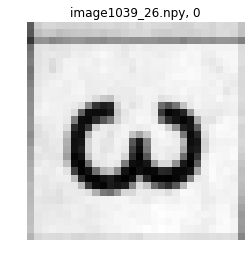

[['0', '5', '3', '4', '0', '7', '6', '1', '0'], ['8', '0', '0', '0', '0', '0', '0', '0', '3'], ['0', '4', '0', '0', '0', '0', '0', '9', '0'], ['3', '0', '0', '8', '0', '6', '0', '0', '5'], ['0', '0', '0', '0', '0', '0', '0', '0', '0'], ['6', '0', '0', '5', '0', '9', '0', '0', '8'], ['0', '1', '0', '0', '0', '0', '0', '2', '0'], ['2', '0', '0', '0', '0', '0', '0', '0', '4'], ['0', '8', '9', '6', '0', '3', '7', '5', '0']]


In [72]:
#get the name of the image and the squareIdx, needed to retrived the label from the labelled dataset
pickImg = random.choice(allNpys)
pickImg = 'image1039_26.npy'
imgName = pickImg.split('_')[0] # + '.npy' for the data, # + '.dat' for the labels
squareIdx = int(pickImg.split('_')[1].split('.')[0])
# #read the dat
#labels = np.loadtxt(os.path.join(labelsDataDir, imgName + '.dat' ))
allLabels = []
with open(os.path.join(labelsDataDir, imgName + '.dat' )) as f:
    allLabels.append([line.split()[0:9] for line in f])

allLabels = allLabels[0][2:11]
allLabels2 = []
for i in range(0, 9):
    allLabels2 = allLabels2 + list(map(int, allLabels[i]))
# check labels
plt.imshow(np.load(os.path.join(npyDataDir, pickImg)), cmap=plt.cm.gray)
plt.title(pickImg + ', ' + str(allLabels2[squareIdx]))
plt.show()
print(allLabels)


Rotated images are an issue. we need to account for it.

The easy ways is for me to create a list of images to rotate, and if the image is one of those:
    
* Rotate the saved npy.
* Modify the image suqreIdx with a function that transpose it

All of this is done below

In [87]:
randNp = np.random.rand(9,9)
print(randNp)  

oldIdx = np.linspace(0,80,81).reshape((9,9))
newIdx = np.rot90(oldIdx, k = 3)
newIdxF = np.ndarray.flatten(newIdx)
print(newIdxF)
print(np.argwhere(newIdxF == 72))

#transpose and use the index of matching number as new index

[[0.20519419 0.13911229 0.92579358 0.50806449 0.76634302 0.74025815
  0.45339826 0.20504869 0.84149227]
 [0.44828759 0.56702462 0.49369511 0.23894933 0.5417929  0.08657049
  0.19940969 0.15291503 0.36034761]
 [0.31324156 0.37588689 0.54442291 0.3517718  0.8034328  0.2589538
  0.44836567 0.79992394 0.58981791]
 [0.87805997 0.80649413 0.00781699 0.02649803 0.34581071 0.88669185
  0.43311028 0.61359802 0.35725618]
 [0.04608723 0.02042196 0.62797968 0.95105706 0.32293895 0.22360377
  0.23563726 0.75912514 0.85623346]
 [0.52524885 0.86616205 0.39406673 0.33587205 0.95044891 0.12206079
  0.95915428 0.73119659 0.02271806]
 [0.47559416 0.52645951 0.29983047 0.85173932 0.31003159 0.7831109
  0.6589037  0.99246979 0.23055067]
 [0.43364285 0.72199973 0.66898959 0.75033053 0.29761185 0.38293023
  0.15846016 0.32554963 0.85518294]
 [0.33618441 0.5677814  0.62291217 0.68711435 0.0267899  0.84199103
  0.34828549 0.63469499 0.47418101]]
[72. 63. 54. 45. 36. 27. 18.  9.  0. 73. 64. 55. 46. 37. 28. 19. 